<a href="https://colab.research.google.com/github/YoonSungLee/DataStructure/blob/master/test1/comStat5(Ch_20_MachineLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rule-based Algorithm : 분류를 직접 정의<br>
M.L : 분류를 스스로 정의

# <font color='blue'><div style="text-align: center">Ch 20. machine learning in Python </font>
    
###  What is machine learning?
Machine Learning is about building programs with **tunable parameters**(미지의 모수) that are adjusted automatically
so as to improve their behavior by adapting to previously seen data. <br>
Machine Learning can be considered a subfield of Artificial Intelligence

• n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a
document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever
you can describe with a fixed set of quantitative traits. <br>
• n_features: The number of features or distinct traits that can be used to describe each item in a quantitative
manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases<br>
• record<br>
• target

In [0]:
# 3종류의 target
# 4개의 feature(width, length, width, length)
# 154개의 observation

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [0]:
iris.data.shape

(150, 4)

In [0]:
n_samples, n_features = iris.data.shape

In [0]:
print(iris.data[0], iris.target[0])

[5.1 3.5 1.4 0.2] 0


In [0]:
iris.target # 0, 1, 2가 각각 50개의 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

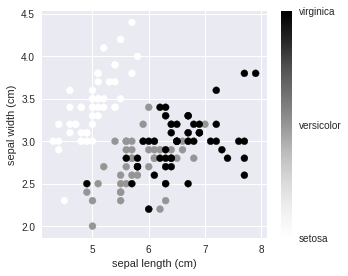

In [0]:
# 2개의 feature만으로 분류가 가능할것인가?
# setosa만 구분 가능

from matplotlib import pyplot as plt
# The indices of the features that we are plotting

x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()


#### Excercise:
Can you choose 2 features to find a plot where it is easier to seperate the different classes of irises?

### <font color='blue'> Supervised Learning: Classification </font>
In classification,
the label is discrete(질적), while in regression, the label is continuous(양적). 

* K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation,
look up in your reference database which ones have the closest features and assign the predominant class(k는 일반적으로 홀수).
* k가 너무 작아도, 너무 커도 정확한 분류를 하기 어렵다.
* 예측하려는 대상과 모든 데이터들과의 유클리디언 거리를 구해 k만큼 주변 데이터들을 추출한다.

In [0]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1) # k = 1, 주변 가장 가까운 1개의 데이터를 선택해서 분류하는 분류기
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])


['virginica']


![knn](https://drive.google.com/uc?id=1sY0tthXvjn_kTz3dQrbI6Z9dePMQFK55)
![knn1](https://drive.google.com/uc?id=1qBjg9jbx8WNUlSXBp38hMEcROuGFWSlN)
![knn2](https://drive.google.com/uc?id=17MJXJ4h9NHn3OOlsOuLfdzQLPLvKrlvU)
 
 Typically, k is set somewhere between 3 and 10. <br>
 One common practice is to set k equal to the square root of the number of training examples. 
 
 ![knn3](https://drive.google.com/uc?id=1dqQvEHcOp8YzYUMJVCpiptrngU1nCY8m)

Normalization을 하지 않으면 특정 feature에 의해 다른 feature들의 거리의 영향이 죽는 상황이 발생한다.

In [0]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(X)
Z

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [0]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.5)

In [0]:
# training dataset
Z_train.shape, y_train.shape

((75, 4), (75,))

In [0]:
knn = neighbors.KNeighborsClassifier(n_neighbors=9) # np.sqrt(75) == 8.6
knn.fit(Z_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [0]:
pred = knn.predict(Z_test)

In [0]:
# accuracy = 71/75
# error rate = 4/75

# precison(정밀도) : AI가 True라고 한 것중에 True의 수
# recall(재현율) : 맞춰야 할 것 중 맞춘 갯수 ex) 암 판별
# F1 score : precision과 recall의 조화평균

from sklearn import metrics
print(metrics.confusion_matrix(y_test, pred)) # 가로축 : y_test, 세로축 : pred

[[24  0  0]
 [ 0 22  2]
 [ 0  2 25]]


### <font color='blue'>  Classification of Handwritten Digits </font>

In [0]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
digits = load_digits()

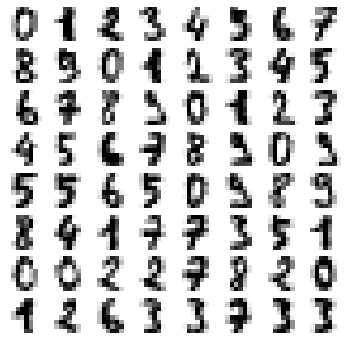

In [0]:
fig = plt.figure(figsize=(6, 6)) # figure size in inches
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [0]:
digits.images[0].shape # image shape is (8,8)

(8, 8)

In [0]:
print(digits.data.shape) # 1797개의 이미지, 64개의 픽셀

(1797, 64)


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(digits.data) # PCA Score
proj.shape

(1797, 3)

In [0]:
proj[0]

array([-1.25946735, 21.27488478, -9.46305653])

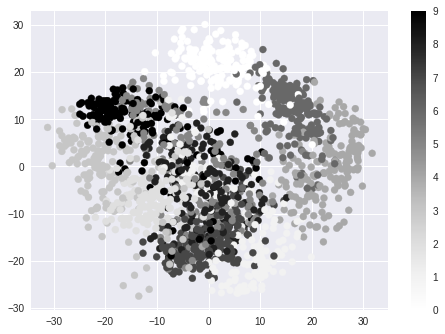

In [0]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

#### PCA(Principal Component Analysis) : 주성분분석
<center><img src="https://drive.google.com/uc?id=1f18bCtm0CFeQ4EdOgpEaYXWYZqcj81NE" width="300" height="300"></center>


PCA is a method of reducing dimensions by using the correlation of multidimensional variables. <br>
The goal of the PCA is to summarize the p-dimensional variables into k-dimensional variables (k < p) with minimal loss.

$$ X \sim (\mu , \Sigma ) $$ <br>
$$ \Sigma = \Gamma \cdot D_{\lambda} \cdot \Gamma' $$
$$ \Gamma  \text{ is an p by p orthononal matrix composed of p eigenvectors} $$
$$ D_{\lambda}  \text{ is an p by p diagonal matrix composed of p eigenvalues} $$
$$ PCA' = \Gamma \cdot X' $$



* 상관계수가 높을수록 PCA를 했을 때 정보의 손실이 적다.
* 분산의 합과 고유값의 합은 같다.
* 고유값은 분산(Variance)을 의미한다.
* 변환 전의 분산의 합과 변환 후의 분산의 합(고유값의 합)은 같다.
* 설명력 = 선택한 고유값들의 합/전체 분산(1에 가까울수록 설명력이 좋다)

### H.W : digit 데이터로 K-nn과 PCA 비교(64차원에서 몇차원까지 줄일 수 있는가)
* Accuracy 를 통해 비교

### ~11.18

#### Gaussian Naive Bayes Classification
Gaussian Naive Bayes fits a Gaussian distribution to each training label independantly on each feature, and uses this to quickly give a rough classification. It is generally not sufficiently accurate for real-world data, but can perform surprisingly well, for instance on text data.

* Bayes Rule
$$ P(A|B) = \frac {P(A \cap B)}{P(B)} =  \frac {P(B|A) \cdot P(A)}{P(B)}$$

<center><img src="https://drive.google.com/uc?id=1HpHiZnH7EY7Jdy2kwBxvqDiSU2TY2jSf" width="400" height="300"></center>

<br>

<center><img src="https://drive.google.com/uc?id=1pQnD-mV4BVbMzaLpZNbtS7f7Jd3qOPIS" width="500" height="200"></center>
<br>

* Gaussian Naive Bayes 


<center><img src="https://drive.google.com/uc?id=1bFhXfHqUgMh4Gxb_8tOFcURmY3St1blo" ></center>

![대체 텍스트](https://i.imgur.com/GZIj991.jpg)

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
# default training vs test size: 75:25

In [0]:
X_train.shape, X_test.shape, y_train.shape

((1347, 64), (450, 64), (1347,))

In [0]:
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
prob = clf.predict_proba(X_test) # prediction 0~1 probability

In [0]:
y_test[0]

1

In [0]:
# We predict the most probable.
prob[0], predicted[0]

(array([0.00000000e+000, 1.00000000e+000, 2.15288104e-076, 6.71415079e-070,
        2.27360060e-015, 8.23603556e-059, 9.45767472e-133, 0.00000000e+000,
        4.52826337e-011, 2.71622658e-044]), 1)

In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 43  1  0  0  0  0  0  1  0]
 [ 0  5 22  1  0  0  0  0 18  0]
 [ 0  0  0 35  0  0  0  1  5  0]
 [ 0  1  0  0 39  0  0  7  0  0]
 [ 0  0  0  0  0 47  1  1  1  0]
 [ 0  0  0  0  0  0 48  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  5  0  1  0  1  0  2 39  0]
 [ 0  4  0  1  1  2  0  6  6 28]]


In [0]:
matches = (predicted == y_test)
print(matches.sum() / len(matches))


0.84


### ~11.20

## Accuracy of class

* Accuracy is maximized when the decision with the greatest probability.(정확성은 가능성이 가장 큰 결정이 내려질 때 극대화된다.)
* However, when the error costs are different(FP, FN cost), it is sometimes possible to make decisions with a low probability.(단, 에러 비용(FP, FN 비용)이 다를 때는 가능성이 낮은 의사 결정이 가능한 경우도 있다.)
* At this time, the threshold should be appropriately divided to divide the class, but the accuracy and cost depend on the threshold value.(이때는 계급을 나누기 위해 임계값을 적절히 나누어야 하지만 정확성과 비용은 임계값에 따라 달라진다.)
* If the threshold value is set abnormally, the precision and recall can not be increased at the same time.(임계값을 비정상적으로 설정하면 정밀도와 회수율을 동시에 높일 수 없다.)
* Accuracy의 한계 : class imbalance(클래스 불균형)
* Accuracy = (정확하게 예측한 case 수)/(전체 case 수)
* Error Rate = 1 - Accuracy
* Precision(정밀도) : Model이 positive로 예측했을 때 몇 %를 맞췄는가?
* Recall(재현율) : 전체 positive 중 몇 %를 맞췄는가?

## 중요
각 클래스마다 precision과 recall을 구해 평균값을 도출해서 모델의 precision과 recall을 정의한다.

In [0]:
y_test.shape, predicted.shape
print(metrics.classification_report(y_test, predicted))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        42
          1       0.74      0.96      0.83        45
          2       0.96      0.48      0.64        46
          3       0.92      0.85      0.89        41
          4       0.97      0.83      0.90        47
          5       0.94      0.94      0.94        50
          6       0.98      1.00      0.99        48
          7       0.67      1.00      0.80        35
          8       0.56      0.81      0.66        48
          9       1.00      0.58      0.74        48

avg / total       0.88      0.84      0.84       450



* Confusion Matrix

![confision](https://drive.google.com/uc?id=1tEzilvgXr7kktsjyDGwB3FoheQUcgx0O)
<br>
TN: True Negative -> Predict to negative and it's true <br>
TP: True Positive -> Predict to positive and it's true <br>
FN: False Negative -> Predict to negative but It's false <br>
FP: False Positive -> Predict to positive but It's false <br>
<br>
$$ precison = \frac{TP}{TP+FP}, \ recall = \frac{TP}{TP+FN} $$
<br>
$$ F_1 = \frac{2 \times Precision \cdot recall}{recall + precision} $$

Precision means the percentage of correct answers when predicting with a positive and 
recall means the percentage of correct answers in actual positives.

* When decisions are positively biased --> FP, TP increased --> recall increased and precision decreased.
* When decisions are negatively biased --> TN, FN increased --> recall decreased and precision  increased

We want to increase recall and precision at the same time <br> 
f1 is the harmonic mean of the precision and recall. <br> 
The harmonic mean becomes larger when the difference in numbers is small.

a = 13 <br>
b = 17<br>
c= 2 /((1/a)+(1/b))<br>
print(c)<br>

a = 20<br>
b = 10<br>
c= 2 /((1/a)+(1/b))<br>
print(c) <br>

* ROC Curve(Receiver-Operating Characteristic curve)

![roc](https://drive.google.com/uc?id=1-lMvGK0YBLCKJXw-nwKkjM4zcd8LuQWU)

True Positive Rate(Y-axis): The percentage of correct answers in actual positives.(TPR = TP/(TP + FN), recall)<br>
False Positive Rate(X-axis) :  The percentage of incorrect answers in actual negatves.(FPR = FP/(FP + TN))<br>
임계값(threshold)을 바꿔주면서 ROC Curve를 그릴 수 있다.<br>
TPR과 FPR은 서로 반비례관계이다.
<br>
Good model is that Y-Axis is high and X-axis is low
--> Does not predict actual Negative to Positive by predicting actual Positive to Positive.


In [0]:
a = 13 
b = 17
c= 2 /((1/a)+(1/b))
print(c)

a = 20
b = 10
c= 2 /((1/a)+(1/b))
print(c) 

14.73333333333333
13.333333333333332


In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'prob': np.array([10,20,30,40,50,60,70,80,90]),
                   'actual': np.array([0,0,1,0,1,1,0,1, 1])})
df

actual  prob
0       0    10
1       0    20
2       1    30
3       0    40
4       1    50
5       1    60
6       0    70
7       1    80
8       1    90

In [0]:
df['pred'] = 0

df['pred'][df['prob'] >= 30] = 1 

TN = FP = FN = TP = 0
for i in range(len(df)):
    if df.loc[i]['actual'] == 0 and df.loc[i]['pred'] == 0: TN += 1
    elif df.loc[i]['actual'] == 0 and df.loc[i]['pred'] == 1: FP += 1
    elif df.loc[i]['actual'] == 1 and df.loc[i]['pred'] == 0: FN += 1
    else: TP += 1    

TPR = TP / (FN + TP)
FPR = FP / (TN + FP)
print(FPR, TPR)

0.5 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


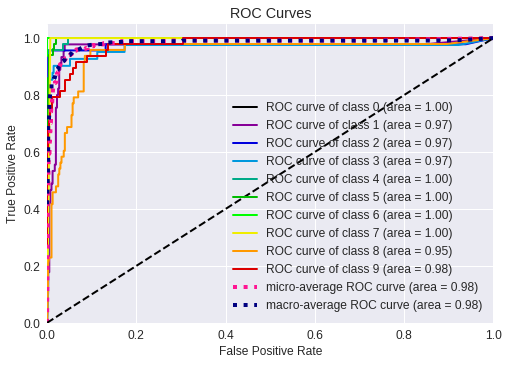

In [0]:
!pip install scikit-plot
import scikitplot as skplt 
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, prob)
plt.show()


#### Decision Tree(의사결정나무)
<center><img src="https://drive.google.com/uc?id=1ydq6NxW2lUCYTbm4d3sltG7hI7sKJBI5" width="450" height="350"></center>
<br>
<center><img src="https://drive.google.com/uc?id=1-thU-UybmnjXvZ0-6mh8pd3-Wj-N1edJ" width="600" height="500"></center>
 Entropy의 낙차가 커지는 방향으로 가지를 만들어나간다.(Number of Celebraties가 Budget보다 Entropy의 낙차를 크게 만든다)


#### 예시
[1] po = 0.7, p1 = 0.3<br>
[2] po = 0.5, p1 = 0.5<br>
[3] po = 0.9, p1 = 0.1<br>
Entropy([1]) = -0.7\*log2(0.7) - 0.3\*log2(0.3)<br>
Entropy([2]) = -0.5\*log2(0.5) - 0.3\*log2(0.5) : 불확실성 high<br>
Entropy([3]) = -0.7\*log2(0.9) - 0.3\*log2(0.1) : 불확실성 low<br>
<br>
단점) Overfitting되기 쉽다.

In [0]:
# Decision Tree를 위한 패키지 설치(설치후, 런타임 다시 시작~)

!pip install pydotplus
!pip install graphviz 
!apt-get install graphviz

    100% |████████████████████████████████| 286kB 11.8MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matches = (predicted == y_test)
print(matches.sum() / len(matches))

0.8711111111111111


In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 40  1  2  0  1  0  0  1  0]
 [ 0  1 41  1  0  1  0  0  2  0]
 [ 0  0  1 34  0  0  0  0  2  4]
 [ 0  0  0  0 43  1  0  2  0  1]
 [ 1  3  0  3  1 34  1  1  4  2]
 [ 0  0  1  0  2  0 44  0  1  0]
 [ 0  0  0  0  2  0  0 31  2  0]
 [ 1  0  3  0  1  0  0  1 41  1]
 [ 0  1  0  0  1  2  0  2  0 42]]


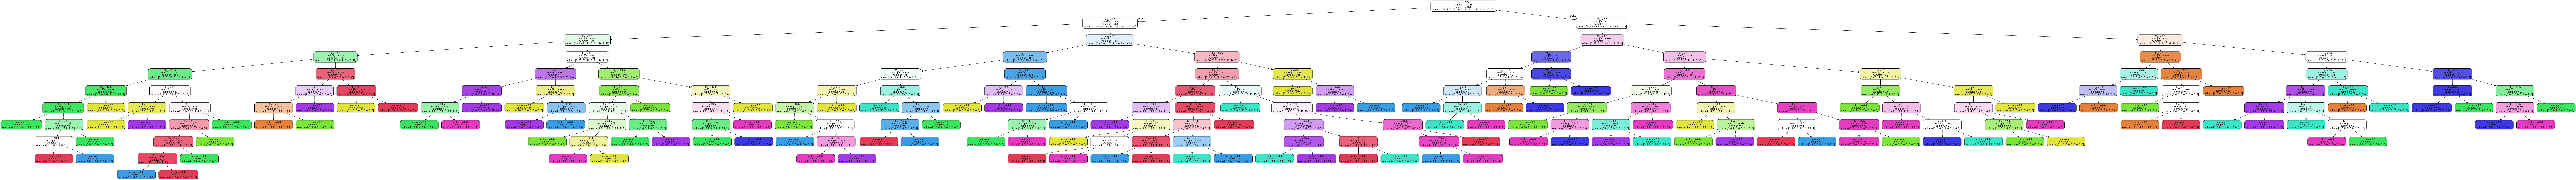

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  

# install graphviz-2.38.msi and need to set the PATH variable yourself.
# http://www.graphviz.org/download/

from sklearn.tree import export_graphviz 
import pydotplus # pip install pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

#### Random Forest
Random forest is the implementation of Decision Tree model with Bagging algorithm.
Bootstrap sample is constructed by sampling with replacement of n samples and features are selected from m features by bootstrap method. 
Then, the number of selected features will be m or less. And create a tree model and estimate the results. The above procedure is repeated k times and we decide the result by voting.<br>
* Boostrap sample : 복원 추출
* 추출할때마다 표본이 다르기 때문에 Decision Tree의 모형이 다를 수 있다.
* feature 또한 다르게 추출하면 Decision Tree의 모형이 더욱 달라진다.
* 표본 변동에 강한 모형
* 특정한 feature의 치우침이 적은 모형

In [0]:
# Pr(i in sample) = 1 - Pr(i not in sample)

1 - 0.99**100

0.6339676587267709

In [0]:
import numpy as np

#Boostrap Sampling

def boostrap(x):
    n = len(x)
    samp = set()
    for i in range(n):
        samp.add(np.random.choice(x))
    return samp

x = np.array(list(range(1,101)))
samp = boostrap(x)
print(len(samp))

65


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matches = (predicted == y_test)
print(matches.sum() / len(matches))

0.9688888888888889


In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  2  0 36  0  0  0  0]
 [ 0  0  0  0  0  1 50  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  1  0  0  0  0  0  1 42  0]
 [ 0  1  0  1  1  1  0  2  0 43]]


### ~11.25

#### AdaBoost

<center><img src="https://drive.google.com/uc?id=1up8pmTlu3Y7I35WaD0rjdATH-MK7LUfU" width="500" height="400"></center>
<br>
<center><img src="https://drive.google.com/uc?id=1OJ35h5U1lZ7oE_m8kJSxytHjB3Bpjxg8" width="500" height="400"></center>
<br>
항상 성능이 좋다고 말할 수 없다.

In [0]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=600,
        learning_rate=1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matches = (predicted == y_test)
print(matches.sum() / len(matches))

0.9822222222222222


In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  1  1]
 [ 0  0  0  0  0  1 51  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  2  0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  2 47]]


#### Logistic Regression

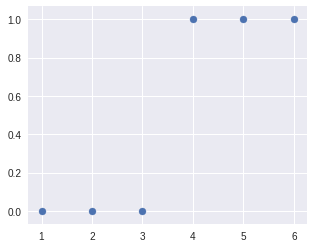

In [0]:
# simple Logistic Regression Problem
import matplotlib.pyplot as plt
x = [1,2,3,4,5,6]
y = [0,0,0,1,1,1]

plt.figure(figsize=(5, 4))
plt.scatter(x, y)

### Note
단순회귀모형의 한계: 예측값을 0과 1 뿐만 아니라 0보다 작거나 1보다 큰 수를 출력할 수 있다.<br><br><br>


Y is 0,1, and the X-axis is metric scale(크기가 존재).<br>
Let's use a logistic function to project the values of the x-axis between 0 and 1.
<center><img src="https://drive.google.com/uc?id=1u0kS2ZRE_dYWpeVClTkPvMgAXQF60Ryl" width="300" height="300"></center>

$$ Y = \frac {1}{1+exp(-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_k x_k + \epsilon))} $$ <br>
$$ Y = \frac {1}{1+exp(-(\beta X + \epsilon))} $$ 

$$ \frac{Y}{1-Y} = \frac{\frac {1}{1+exp(-(\beta X + \epsilon))}}{\frac {exp(-(\beta X + \epsilon)}{1+exp(-(\beta X + \epsilon))}} = \frac {1}{exp(-(\beta X +\epsilon))} = exp(\beta X + \epsilon) $$

$$ ln \left( \frac {p_i}{1-p_i} \right) = \hat\beta X  = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 + \cdots + \hat\beta_k x_k $$

$$ Pr(Y=1|X=x) = \hat{p_i} = \frac {1}{1+exp(-(\hat{\beta} X))} $$



### Note
Linear하게 만들어주는 과정<br>
pi_hat이 등장하면서 ϵ을 식에서 제거<br>
ϵ : 설정해준 feature 이외에 y에 영향을 주는 모든 요소

* logistic function은 비선형이기 때문에 SSE를 통해 cost function을 구성할 수 없다(local minimum 존재). 따라서 식을 변환시켜 convex한 cost function을 재구성해야 하고, 그것이 바로 Cross Entropy Cost function이다.


* Cross Entropy Cost function

   The cost function is large when the difference between y and h(x*W) is large, and the cost is small when the difference is small.

  $$ Cost(W) = \sum_{i=1}^n \big(- y_i \cdot log\ h(X\cdot W) -(1-y_i)(log(1-h(X\cdot W)) \big) $$

  This Cost function satisfies convexity.


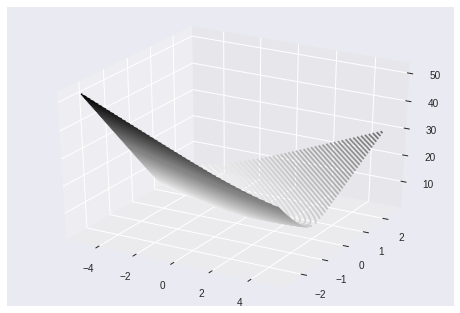

In [0]:
# cost function convexity 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sig(x):
    return 1/(1+np.exp(-x))

x = np.array([1,2,3,4,5,6])
y = np.array([0,0,0,1,1,1])
xy = np.array([[1,0],[2,0],[3,0],[4,1],[5,1],[6,1]])
n = y.shape

n = 100
a = np.linspace(-5, 5, n)
b = np.linspace(-2.5, 2.5, n)
a, b = np.meshgrid(a, b) # 밑면의 판

cost1 = np.zeros((100, 100)) # cross entropy function
for val in xy:
    temp = -val[1] * np.log(sig(a+b*val[0])) - (1-val[1]) * np.log(1-sig(a+b*val[0]))
    cost1 += temp

cost2 = np.zeros((100, 100))
for val in xy:
    temp = (val[1]-sig(a+b*val[0]))**2 # error sums of squre function
    cost2 += temp

ax = plt.axes(projection='3d')
ax.contour3D(a, b, cost1, 100, cmap='binary') # satisfies convexity


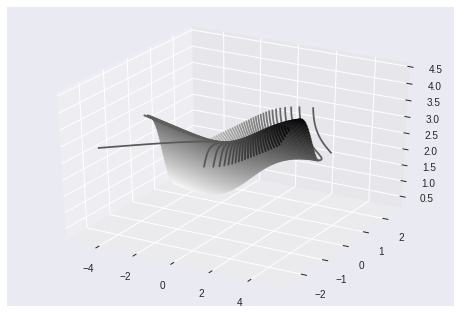

In [0]:
ax = plt.axes(projection='3d')
ax.contour3D(a, b, cost2, 100, cmap='binary') # don't satisfies convexity

* Finding weights

   Weights are obtained by Gradient Descending method which minimizes cross entropy function. <br>

$$ W \leftarrow W - \alpha \frac{\partial Cost(W)}{\partial W} $$ <br>
$$ Cost(W) = \sum \big(- y_i \cdot log\ h(X\cdot W) -(1-y_i)(log(1-h(X\cdot W)) \big)   $$

$$ \frac{\partial Cost(W)}{\partial W} = \sum \big( y_i(1-h(X\cdot W)) X + (1-y_i)h(X\cdot W)X )
     = t(X) \cdot (h(X\cdot W) - Y)
$$
<br>
* Differencial of Sigmoid function 

$$ y = \frac{1}{1+exp(-x)}$$
$$ y' = \frac{exp(-x)}{(1+exp(-x))^2} =\frac{1}{1+exp(-x)} \frac{exp(-x)}{1+exp(-x)} = y(1-y)$$

In [0]:
import numpy as np

x = np.array([[1,1],[1,2],[1,3],[1,4],[1,5],[1,6]])
y = np.array([[0],[0],[0],[1],[1],[1]])

def sig(x,w):
    return 1/(1+np.exp(- np.dot(x,w)))

def deriv(x,w):
    return np.dot(np.transpose(x), (sig(x,w) - y)/6)

w = np.array([[-0.1],[0.1]]) # initial Start
print(sig(x,w)) # It does not work

# 실제값 = [[0],[0],[0],[1],[1],[1]]

[[0.5       ]
 [0.52497919]
 [0.549834  ]
 [0.57444252]
 [0.59868766]
 [0.62245933]]


In [0]:
alpha=0.05 # learn rate

for i in range(1000):
    w = w - alpha * deriv(x,w)
    if i%100 == 0: print(w)

[[-0.10308669]
 [ 0.12312146]]
[[-0.81188609]
 [ 0.40351972]]
[[-1.40964181]
 [ 0.55551935]]
[[-1.9073768 ]
 [ 0.68427463]]
[[-2.33131374]
 [ 0.79526022]]
[[-2.69985695]
 [ 0.89259963]]
[[-3.02583259]
 [ 0.97928718]]
[[-3.31831522]
 [ 1.0574977 ]]
[[-3.58386927]
 [ 1.12883301]]
[[-3.82735559]
 [ 1.19449485]]


In [0]:
# 0.5 기준

print(sig(x,w)) # Accuracy: 100% 

[[0.05756945]
 [0.17643992]
 [0.42902214]
 [0.72491459]
 [0.90236529]
 [0.97007272]]


In [0]:
from  sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matches = (predicted == y_test)
print(matches.sum() / len(matches))

0.9688888888888889


In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted))

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  2  0]
 [ 0  0 53  1  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  1  0  0  0]
 [ 0  1  0  0  0 36  0  0  1  0]
 [ 0  1  0  0  0  1 50  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  2  1  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  0  0  0  1 47]]


In [0]:
model.coef_.shape, model.intercept_.shape # intercept & coef. of features

((10, 64), (10,))

### ~11.27

<font color='red'> H.W #10:  Free topic for classification </font>

### <font color='blue'> Supervised Learning: Regression of Housing Data </font>

In [0]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)

(506, 13)


In [0]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

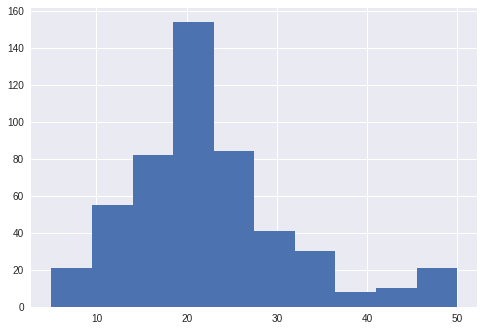

In [0]:
plt.hist(data.target)

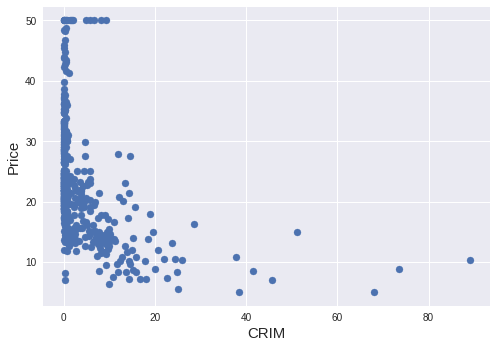

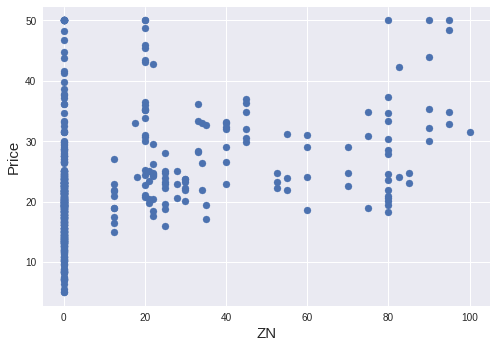

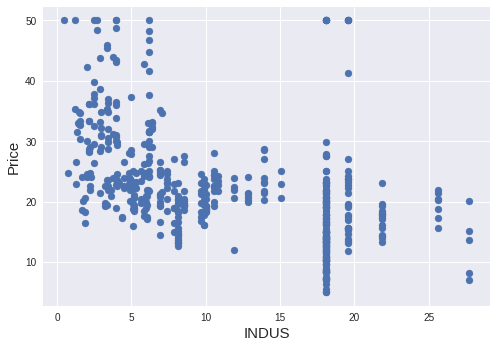

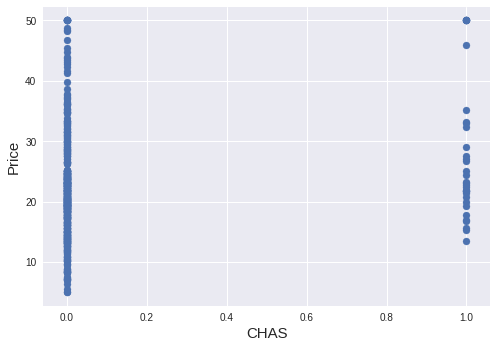

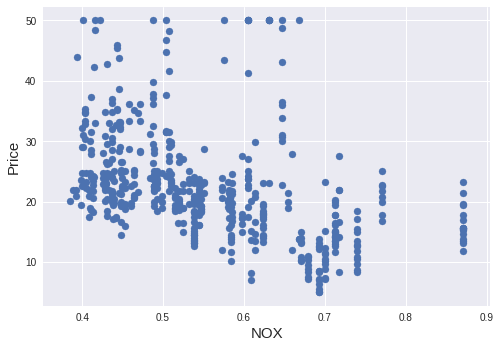

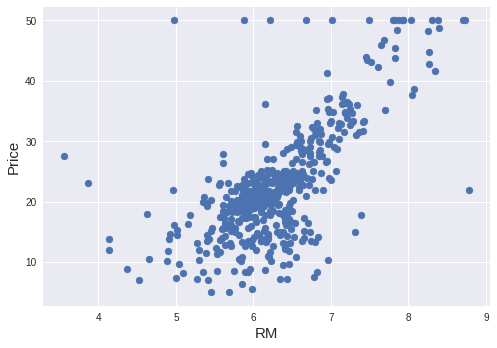

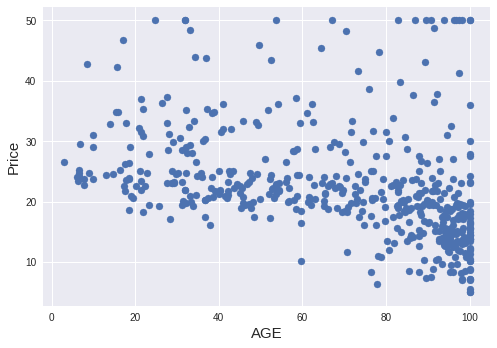

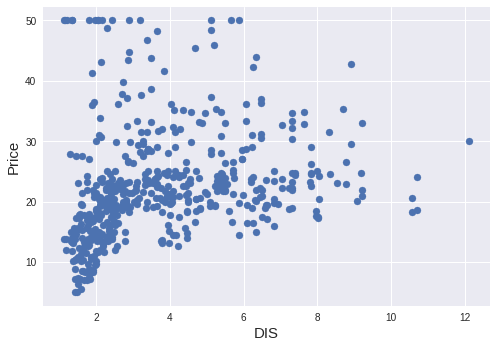

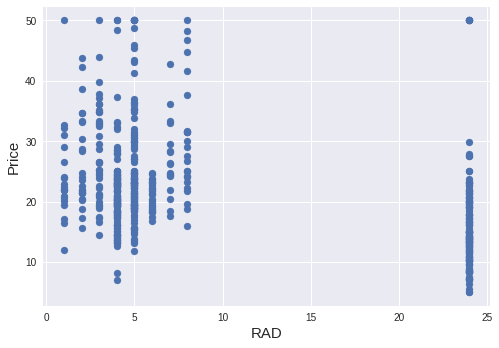

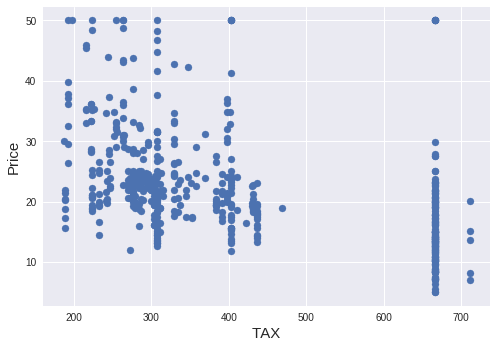

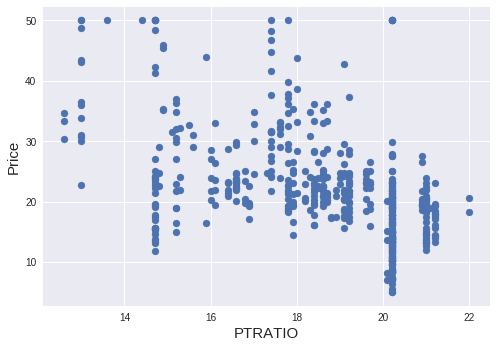

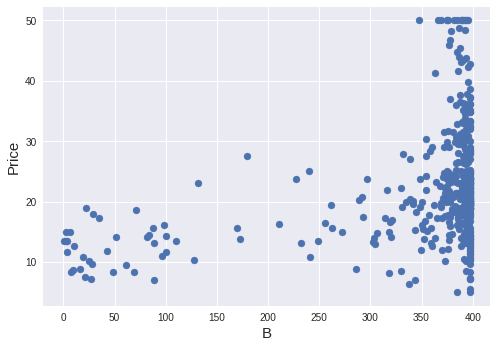

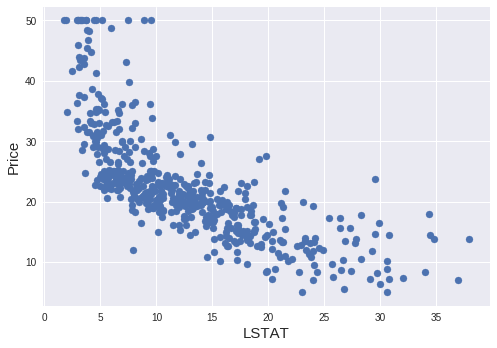

In [0]:
 for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.linear_model import LinearRegression
import numpy as np
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

# SSE : (predicted - expected) ** 2)
# MSE : np.mean((predicted - expected) ** 2))
# RMSE : np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 4.91731359117596 


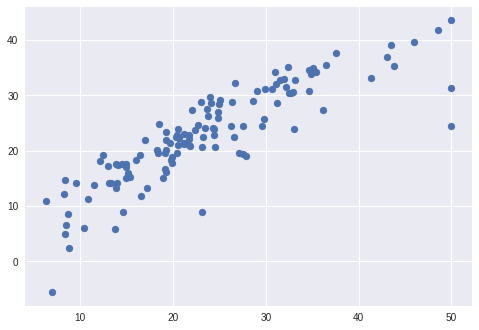

In [0]:
plt.scatter(expected, predicted)

<font color='red'> H.W #11: <br>
1. Use the following results to construct the regression equation and obtain the predicted value. Does the result match the predicted values?<br>
2. Can the magnitude of the regression coefficient be the importance of each variable? If not, how can we get it?</font>

* X를 normalization한 이후 Regression 모델에 적합시켜서 나온 coef중에서 절댓값이 가장 큰 coef에 해당하는 feature가 가장 중요한 feature라고 할 수 있다.
* Regression 모델은 실제 데이터들 사이의 관계가 비선형인 경우에는 예측에 약하다.

In [0]:
clf.coef_, clf.intercept_

(array([-1.26586430e-01,  3.99171779e-02,  5.17833517e-02,  1.92448865e+00,
        -1.57680286e+01,  4.23957217e+00, -5.81714997e-03, -1.33959262e+00,
         2.86324855e-01, -1.25019084e-02, -9.26915416e-01,  1.02824455e-02,
        -4.89970905e-01]), 31.21854422304244)

### Decision Tree Regression
* Linear Regression의 선형적 예측 한계 때문에 등장한 머신러닝 기법<br>



This figure is an example of predicting people's wine preferences to the characteristics of wine (alcohol, volatile, free-sul).<br>
Decision Tree Regression is effective when there is a nonlinear relationship existing in the multidimensional space or when there are too many features.<br>

![regressionTree](https://drive.google.com/uc?id=150Z6KE7xFcgaH8gv0ekRj6Pw8ljkfvvs)

The figure below shows two values based on x = 7, which is the average Y for x <7 and  x> 7.
![regressionTree1](https://drive.google.com/uc?id=13ZbRwrZpN7v1sn0EbQK4ayzfAvuOz32k) <br>
x = 7 is the point at which the SDR(Standard Deviation Reduction) of Y is maximized.


* x = 7 인 기준을 정하는 방법
* x = 7일때 SDR의 값이 가장 크다.
$$ SDR = sd(Y) - \overline{sd(Y_i )},\ \ \  \overline{sd(Y_i )} \text{ is weighted average} $$

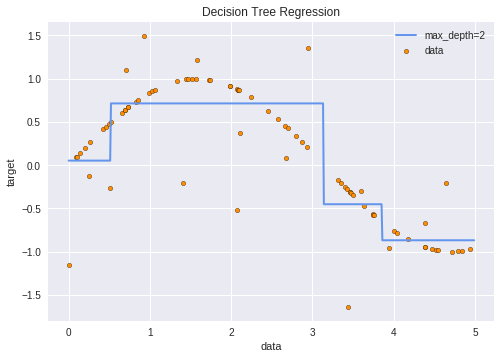

In [0]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
# Fit regression model(depth = 2, node = 4)
#  As the number of nodes increases, the accuracy increases. If it is too large, overfit occurs
regr_1 = DecisionTreeRegressor(max_depth=2) # Tree Node: 2**max_depth = 4,max_depth가 커질수록 overfitting 되기 쉽다.
regr_1.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


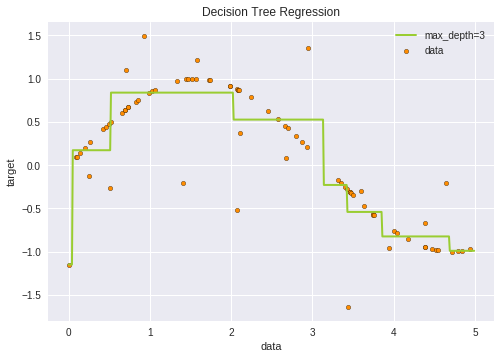

In [0]:
regr_2 = DecisionTreeRegressor(max_depth=3) # Tree Node: 2**max_depth = 8
regr_2.fit(X, y)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

RMS: 3.8415820029351995 


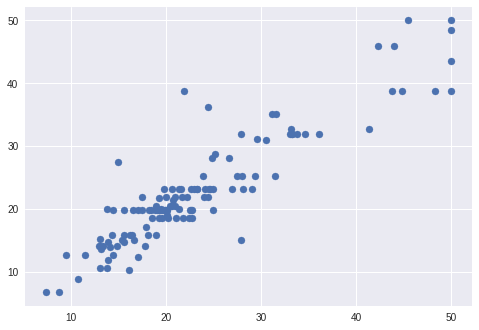

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.tree import DecisionTreeRegressor
import numpy as np
regr = DecisionTreeRegressor(max_depth=7) # Tree Node: 2**max_depth = 4
regr.fit(X, y)
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))
plt.scatter(expected, predicted)


In [0]:
regr.feature_importances_

array([8.37936435e-02, 5.01269938e-05, 4.15063778e-03, 0.00000000e+00,
       2.02561565e-02, 2.80212084e-01, 1.16940859e-02, 9.57002705e-02,
       2.46827195e-04, 9.19812294e-03, 1.26653555e-02, 8.90646967e-04,
       4.81142042e-01])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 6.7631618020994235 


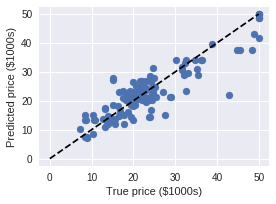

In [0]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

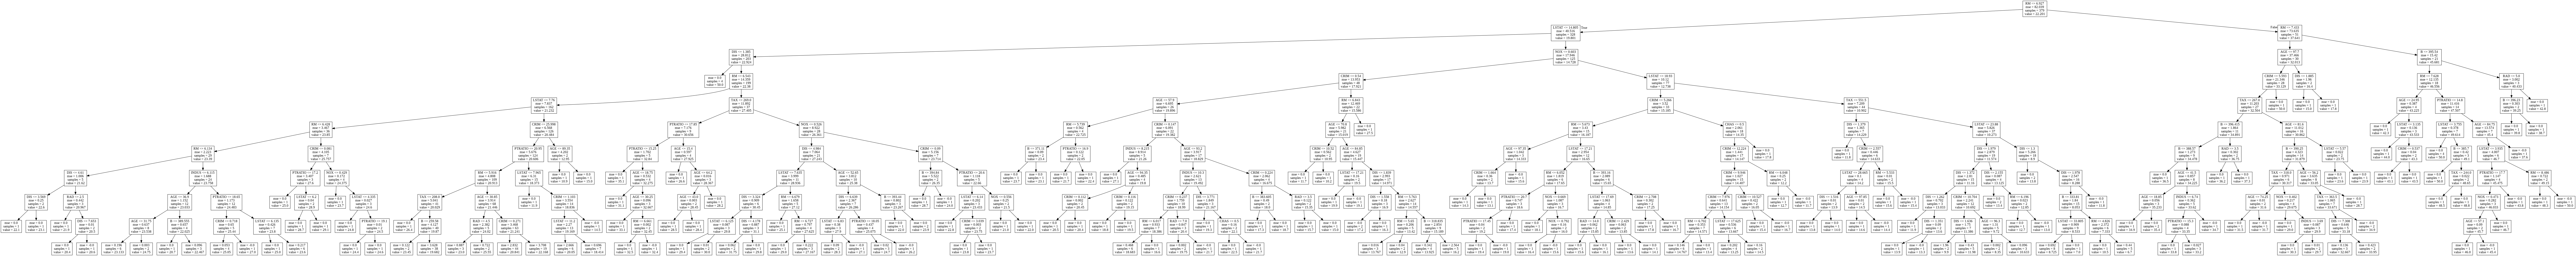

In [0]:
!pip install pydotplus
import pydotplus

from sklearn.tree import export_graphviz
dot_data = export_graphviz(regr, feature_names=data.feature_names,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

* AdaBoosting Regression <br>
In bagging, each training sample is equally likely to be picked. In AdaBoosting, the probability of a particular sample being in the training set depends on the performance of the prior decision. <br>
Initially, to each training pattern we assign a weight $w_i =1, i =1, ..., N_1 $



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
regr1 = DecisionTreeRegressor(max_depth=10)
regr2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=300, random_state=rng)
regr1.fit(X_train, y_train)
regr2.fit(X_train, y_train)
predicted1 = regr1.predict(X_test)
predicted2 = regr2.predict(X_test)
expected = y_test
print("RMS: %s " % np.sqrt(np.mean((predicted1 - expected) ** 2)))
print("RMS: %s " % np.sqrt(np.mean((predicted2 - expected) ** 2)))

RMS: 3.340027725213178 
RMS: 2.743631145049015 


* Gradient Boosting Tree Regression <br>
Gradient Boosting is an algorithm that improves Adaboost. 

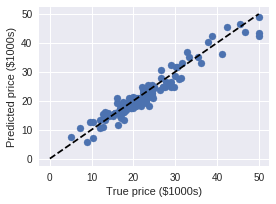

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [0]:
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 2.3798352014707387 


<font color='red'> H.W #12: <br>
Create a model that predicts Boston house prices using multiple regression methods.
</font>

### <font color='blue'> <div style="text-align: center">End of Chapter </font>  